In [25]:
import h5py
import numpy as np
import pandas as pd
import os
import seaborn as sns


DATA_DIR = '../data/enhancer_annotation'
BED_FILE = os.path.join(DATA_DIR, 'enhancer_annotation.bed')
H5_FILE = os.path.join(DATA_DIR, 'enhancer_annotation.hdf5')

In [2]:
enhancer_df = pd.read_csv(BED_FILE, sep='\t')
enhancer_df

,chromosome,start,end,gene,score,strand,split
0,chr10,104288458,104388554,ITPRIP,NaN,.,part2
1,chr1,180582042,180682138,XPR1,NaN,.,part9
2,chr11,263962,364058,IFITM1,NaN,.,part5
3,chr1,225377934,225478030,LBR,NaN,.,part9
4,chr1,247807202,247907298,TRIM58,NaN,.,part9
...,...,...,...,...,...,...,...
280,chr19,12619423,12719519,WDR83OS,NaN,.,part6
281,chr19,12888591,12988687,CALR,NaN,.,part6
282,chr3,129133800,129233896,CNBP,NaN,.,part4
283,chr12,54369206,54469302,ITGA5,NaN,.,part5


In [4]:
len(enhancer_df) == len(enhancer_df['gene'].unique())

True

In [7]:
enhancer_df['length'] = enhancer_df['end'] - enhancer_df['start']
enhancer_df['length'].describe()

count       285.0
mean     100096.0
std           0.0
min      100096.0
25%      100096.0
50%      100096.0
75%      100096.0
max      100096.0
Name: length, dtype: float64

In [9]:
enhancer_df['split'].value_counts()

split
part9     35
part10    33
part6     31
part5     28
part3     28
part4     28
part2     27
part1     27
part8     24
part7     24
Name: count, dtype: int64

Sequences are 100096 bp long, however the labels for each sequence are just 782.
The reason being that each label applies to a binned dna segment of 128 bp. The label will be 1 if the binned segment contains at least 1 nucleotide lying in the enhancer element, 0 otherwise.

<Axes: >

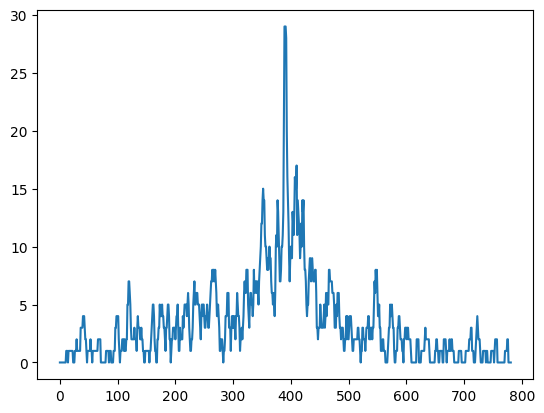

In [ ]:
# Occurrence of enhancers across dna sequence positions

labels_data = np.array(h5py.File(H5_FILE, 'r')['labels'])
enhancers_spread = labels_data.sum(axis=0)
enhancers_spread

sns.lineplot(enhancers_spread)


The graph shows the distribution of 1 labels in the binned dna segments.